   LATITUDE  LONGITUDE ROADCOND WEATHER  TIME                Time  Hour
0   35.0456   -85.2672      Dry   Clear   830 1900-01-01 08:30:00     8
1   35.0495   -85.2580      Wet    Rain  1745 1900-01-01 17:45:00    17
2   35.0510   -85.2500      Dry   Clear  1330 1900-01-01 13:30:00    13
3   35.0462   -85.2605     Snow     Icy  2200 1900-01-01 22:00:00    22
4   35.0488   -85.2555      Dry     Fog   630 1900-01-01 06:30:00     6


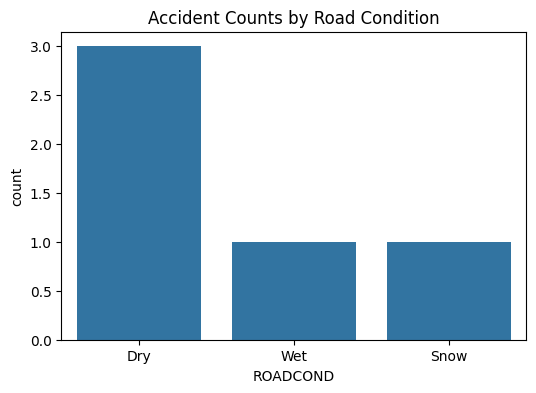

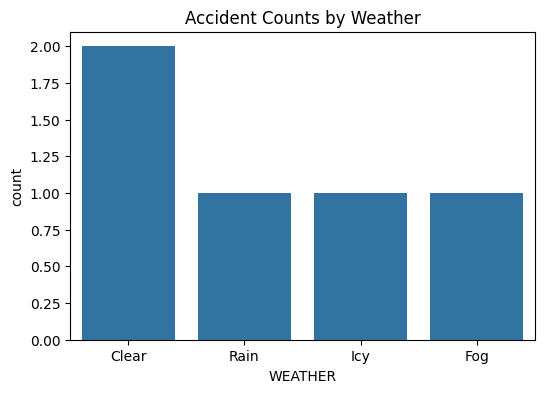

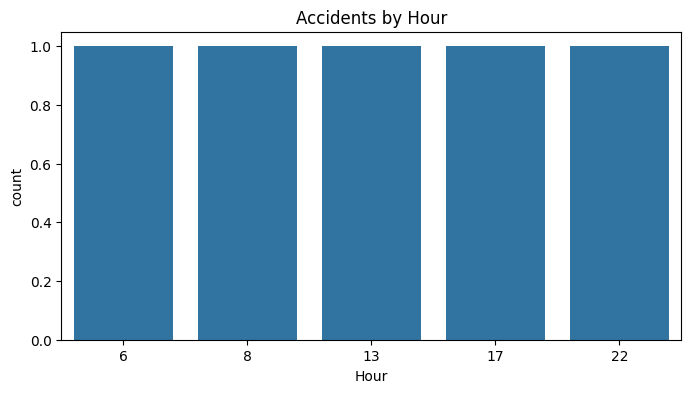

Map saved as accident_hotspots.html


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load local CSV file (replace with your own file if needed)
df = pd.read_csv('sample_accidents.csv')

# Convert 'TIME' (HHMM) to datetime
df['Time'] = pd.to_datetime(df['TIME'].astype(str).str.zfill(4), format='%H%M', errors='coerce')
df['Hour'] = df['Time'].dt.hour

# Preview data
print(df.head())

# Visualizations
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='ROADCOND', order=df['ROADCOND'].value_counts().index)
plt.title('Accident Counts by Road Condition')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='WEATHER', order=df['WEATHER'].value_counts().index)
plt.title('Accident Counts by Weather')
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Hour')
plt.title('Accidents by Hour')
plt.show() 

# Create map of hotspots
map_center = [df['LATITUDE'].mean(), df['LONGITUDE'].mean()]
m = folium.Map(location=map_center, zoom_start=13)
heat_data = df[['LATITUDE', 'LONGITUDE']].values.tolist()
HeatMap(heat_data).add_to(m)
m.save('accident_hotspots.html')
print("Map saved as accident_hotspots.html")
